In [70]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier





In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [68]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [15]:
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])

df['ever_married']= label_encoder.fit_transform(df['ever_married'])

df['work_type']= label_encoder.fit_transform(df['work_type'])

df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])

df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [19]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
df.shape

(5110, 12)

In [28]:
df1 = df.dropna()
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [50]:
X=df1.drop(['id','stroke','gender','Residence_type'],axis=1)
y=df1['stroke']
X

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,1,2,228.69,36.6,1
2,80.0,0,1,1,2,105.92,32.5,2
3,49.0,0,0,1,2,171.23,34.4,3
4,79.0,1,0,1,3,174.12,24.0,2
5,81.0,0,0,1,2,186.21,29.0,1
...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,4,103.08,18.6,0
5106,81.0,0,0,1,3,125.20,40.0,2
5107,35.0,0,0,1,3,82.99,30.6,2
5108,51.0,0,0,1,2,166.29,25.6,1


In [39]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

<AxesSubplot:>

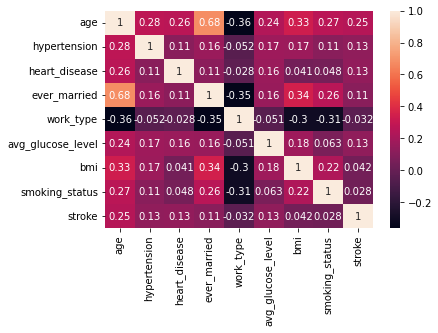

In [54]:
sns.heatmap(data=df[['age','hypertension','heart_disease','ever_married','work_type','avg_glucose_level','bmi','smoking_status','stroke']].corr(), annot=True)

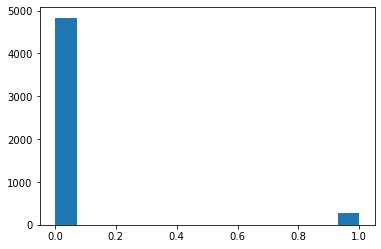

In [52]:
heart = plt.hist(x=df.heart_disease, bins='auto')

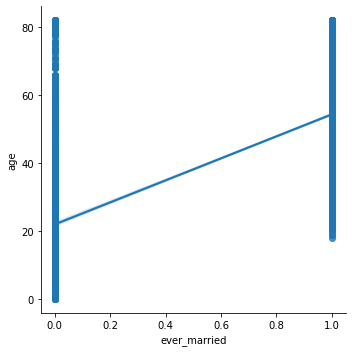

In [53]:
sns.lmplot(data=df, x="ever_married", y="age")

In [ ]:
sns.lmplot(data=df, x="ever_married", y="age")

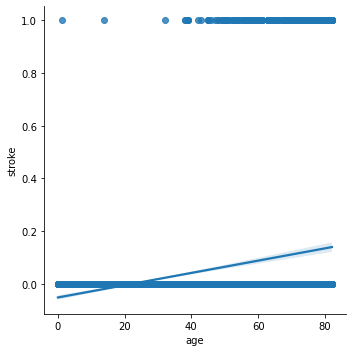

In [57]:
sns.lmplot(data=df, x="age", y="stroke")

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, train_size = .67)


In [47]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

predicted = logr.predict(X_test)
predicted.shape

(1620,)

In [42]:
acc = accuracy_score(y_test,predicted)
print(acc)

0.9537037037037037


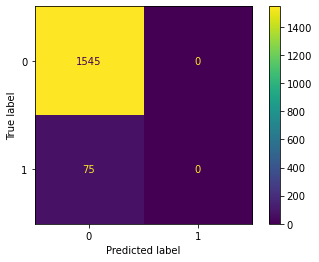

In [43]:
matrix = plot_confusion_matrix(logr, X_test, y_test)  

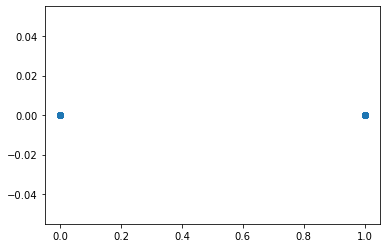

In [60]:
plt.scatter(y_test, predicted)

In [66]:
cross_val_score(logr,X,y,cv=10)

array([0.95723014, 0.95723014, 0.95723014, 0.95723014, 0.95723014,
       0.95723014, 0.95519348, 0.95723014, 0.9592668 , 0.95918367])

In [71]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc2 = accuracy_score(y_test,y_pred)
print(acc2)

0.9530864197530864


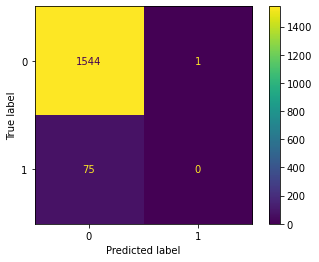

In [72]:
matrix2 = plot_confusion_matrix(knn, X_test, y_test)  

In [73]:
cross_val_score(knn,X,y,cv=10)

array([0.95723014, 0.95723014, 0.95519348, 0.95723014, 0.95723014,
       0.95723014, 0.95519348, 0.95315682, 0.95519348, 0.95918367])

In [78]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

y_pred3 = clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
acc3 = accuracy_score(y_test,y_pred3)
print(acc3)

0.9537037037037037


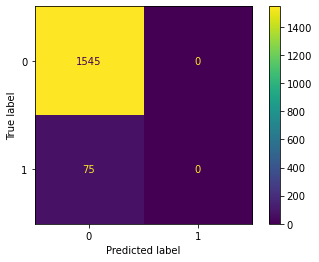

In [81]:
matrix2 = plot_confusion_matrix(clf, X_test, y_test)  